In [ ]:
二分类示例

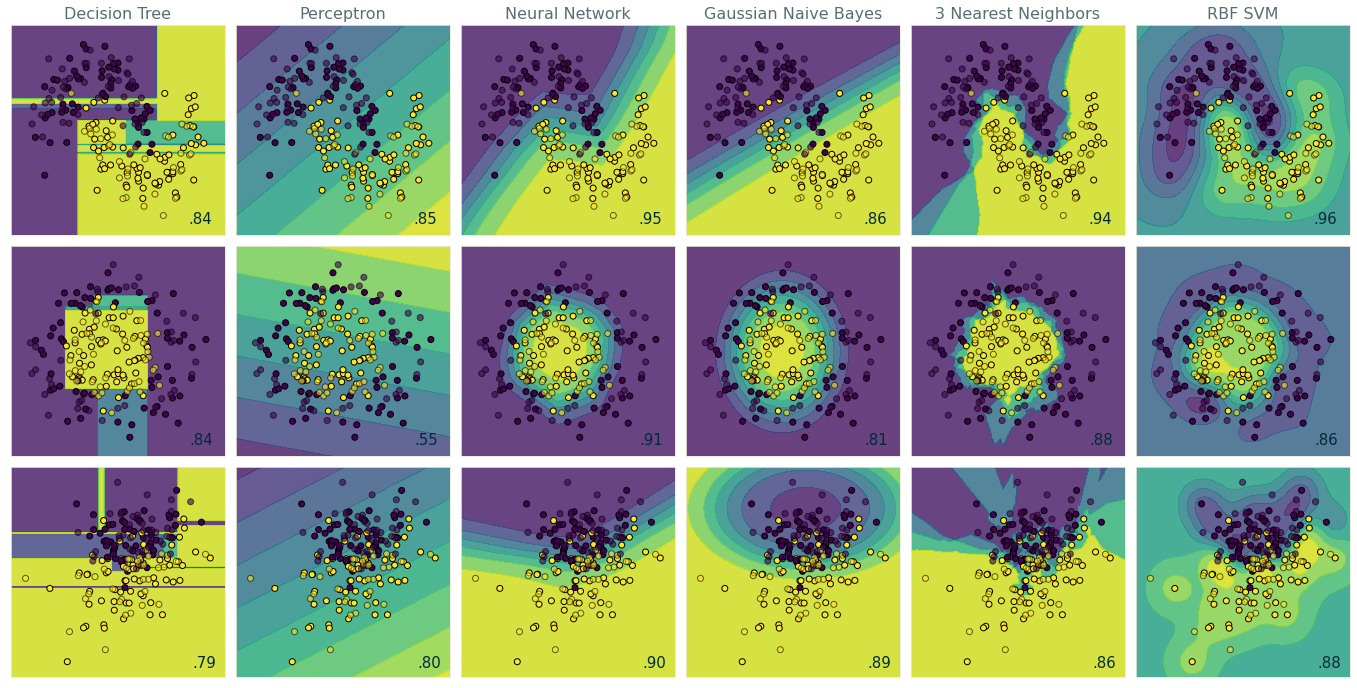

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

h = .02
m = 200

names = [
    "Decision Tree",
    "Perceptron",
    "Neural Network",
    "Gaussian Naive Bayes",
    "3 Nearest Neighbors",
    "RBF SVM",
]

classifiers = [
    DecisionTreeClassifier(max_depth=5),
    Perceptron(eta0=0.5),
    MLPClassifier(alpha=1, max_iter=1000),
    GaussianNB(),
    KNeighborsClassifier(3),
    SVC(gamma=2, C=1),
]

X, y = make_classification(n_samples=m, n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(n_samples=m, noise=0.2, random_state=0),
    make_circles(n_samples=m, noise=0.2, factor=0.5, random_state=1),
    linearly_separable
]

figure = plt.figure(figsize=(24, 12))
i = 1

with plt.style.context('Solarize_Light2'):
    for index, ds in enumerate(datasets):

        X, y = ds
        X = StandardScaler().fit_transform(X)  # 标准化
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)  # 训练集、测试集

        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        for name, clf in zip(names, classifiers):
            ax = plt.subplot(len(datasets), len(classifiers), i)

            clf.fit(X_train, y_train)  # 训练模型
            score = clf.score(X_test, y_test)  # 测试

            if hasattr(clf, "decision_function"):
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            else:
                Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

            Z = Z.reshape(xx.shape)
            ax.contourf(xx, yy, Z, alpha=.8)
            
            ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k')
            ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', alpha=0.6)

            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())
            if index == 0:
                ax.set_title(name, color='#586e75')
            ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'), size=15, horizontalalignment='right', color='#002b36')

            i += 1

plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()